In [2]:
import pandas as pd
import numpy as np
import yaml

In [4]:
try:
    with open("./../params.yaml", "r") as file:
        config = yaml.safe_load(file)
except Exception as e:
    print("Error reading the config file")

In [5]:
sleep_data = pd.read_csv(config["data"]["clean_data"])
sleep_data.head()

,participant_number,type_parents,birth_1mth_m_inclusion,birth_12mth_m_inclusion,age,marital_status,marital_status_edit,education,gestationnal_age,type_pregnancy,...,ibq_r_vsf_10_bb1,ibq_r_vsf_16_bb1,ibq_r_vsf_17_bb1,ibq_r_vsf_28_bb1,ibq_r_vsf_29_bb1,ibq_r_vsf_32_bb1,ibq_r_vsf_33_bb1,night_awakening_number_bb1,how_falling_asleep_bb1,hours_of_sleep_float
0,1,1,1,1,34,2,2,5,37.0,1,...,4,7,3,4,7,6,5,3,2,10.0
1,2,1,1,1,33,2,2,5,42.0,1,...,2,3,2,2,2,3,4,0,4,11.0
2,3,1,1,1,37,2,2,5,41.0,1,...,4,4,3,1,4,4,4,1,2,12.0
3,4,1,1,1,31,2,2,5,37.5,1,...,1,3,2,3,4,5,4,2,1,11.0
4,5,1,1,1,36,1,1,5,40.0,1,...,4,2,2,4,5,6,6,1,4,10.5


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

Checking if there is a balance in the split between month groups:

[Text(0, 0, '3-6 months'), Text(1, 0, '6-9 months'), Text(2, 0, '9-12 months')]

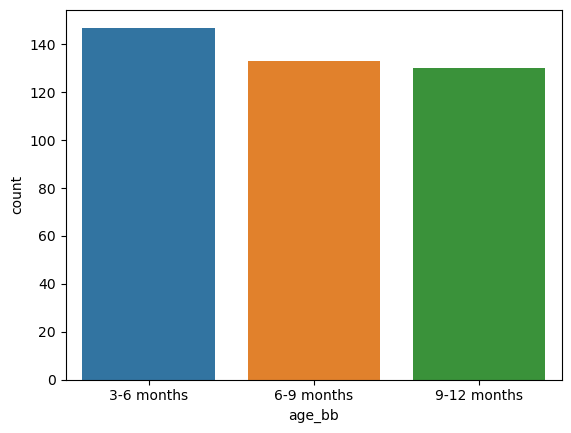

In [9]:
ax = sns.countplot(data=sleep_data, x="age_bb")
ax.set_xticklabels(["3-6 months", "6-9 months", "9-12 months"])

Renaming age column values for visualization purposes

In [10]:
def baby_month(age_bb):
    if age_bb == 1:
        return '3-6 months'
    elif age_bb == 2:
        return '6-9 months'
    else:
        return "9-12 months"

sleep_data["baby_months"] = sleep_data["age_bb"].apply(baby_month)
sleep_data

,participant_number,type_parents,birth_1mth_m_inclusion,birth_12mth_m_inclusion,age,marital_status,marital_status_edit,education,gestationnal_age,type_pregnancy,...,ibq_r_vsf_16_bb1,ibq_r_vsf_17_bb1,ibq_r_vsf_28_bb1,ibq_r_vsf_29_bb1,ibq_r_vsf_32_bb1,ibq_r_vsf_33_bb1,night_awakening_number_bb1,how_falling_asleep_bb1,hours_of_sleep_float,baby_months
0,1,1,1,1,34,2,2,5,37.0,1,...,7,3,4,7,6,5,3,2,10.0,3-6 months
1,2,1,1,1,33,2,2,5,42.0,1,...,3,2,2,2,3,4,0,4,11.0,9-12 months
2,3,1,1,1,37,2,2,5,41.0,1,...,4,3,1,4,4,4,1,2,12.0,3-6 months
3,4,1,1,1,31,2,2,5,37.5,1,...,3,2,3,4,5,4,2,1,11.0,9-12 months
4,5,1,1,1,36,1,1,5,40.0,1,...,2,2,4,5,6,6,1,4,10.5,9-12 months
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,406,1,1,1,31,2,2,3,39.5,1,...,6,1,2,4,2,3,1,2,9.0,6-9 months
406,407,1,1,1,26,2,2,2,37.0,1,...,2,1,1,1,2,1,0,4,12.0,6-9 months
407,408,1,1,1,26,2,2,5,39.0,1,...,2,1,3,2,3,2,2,5,10.0,3-6 months
408,409,1,1,1,27,2,2,5,41.2,1,...,2,1,1,2,2,1,0,4,11.5,3-6 months


Distribution of hours of sleep based on age group. Building a FacedGrid with Tableau

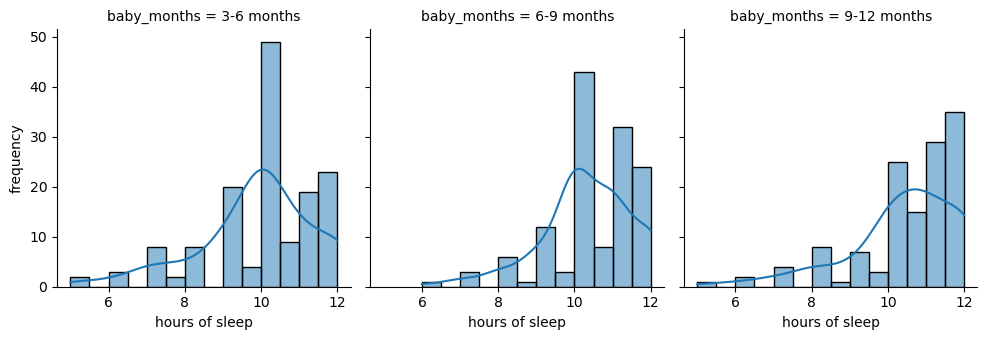

In [11]:
baby_months_order =['3-6 months','6-9 months','9-12 months']
g =sns.FacetGrid(sleep_data, col= "baby_months", col_order = baby_months_order, height=3.5, aspect=.95)
g.map(sns.histplot, "hours_of_sleep_float", kde=True, binwidth=0.5)
g.set(xlabel='hours of sleep', ylabel='frequency')
#g.map(sns.kdeplot, "hours_of_sleep_float", color ="r")
#g.map_dataframe(sns.histplot, x="night_awakening_number_bb1")
g.tight_layout()

Saving the image in the separate folder

In [12]:
g.savefig(config["images"]["hours_by_months"])

Checking the distribution of nigth awakenings based on age group

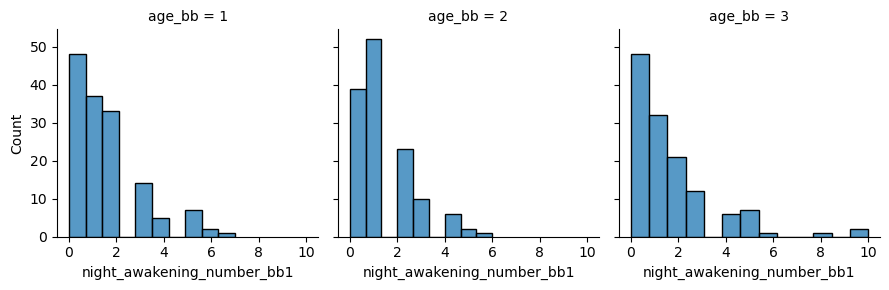

In [13]:
g =sns.FacetGrid(sleep_data, col="age_bb")
g.map_dataframe(sns.histplot, x="night_awakening_number_bb1")
#g.map_dataframe(sns.histplot, x="night_awakening_number_bb1")
g.tight_layout()

In [13]:
sleep_data["night_awakening_number_bb1"].value_counts()

0     135
1     121
2      77
3      36
4      17
5      16
6       4
10      2
8       1
7       1
Name: night_awakening_number_bb1, dtype: int64

Renaming gender column values for visualization purposes

In [15]:
def baby_gender(sex_baby1):
    if sex_baby1 == 1:
        return 'girl'
    else:
        return "boy"

sleep_data["baby_gender"] = sleep_data["sex_baby1"].apply(baby_gender)
sleep_data

,participant_number,type_parents,birth_1mth_m_inclusion,birth_12mth_m_inclusion,age,marital_status,marital_status_edit,education,gestationnal_age,type_pregnancy,...,ibq_r_vsf_17_bb1,ibq_r_vsf_28_bb1,ibq_r_vsf_29_bb1,ibq_r_vsf_32_bb1,ibq_r_vsf_33_bb1,night_awakening_number_bb1,how_falling_asleep_bb1,hours_of_sleep_float,baby_months,baby_gender
0,1,1,1,1,34,2,2,5,37.0,1,...,3,4,7,6,5,3,2,10.0,3-6 months,girl
1,2,1,1,1,33,2,2,5,42.0,1,...,2,2,2,3,4,0,4,11.0,9-12 months,boy
2,3,1,1,1,37,2,2,5,41.0,1,...,3,1,4,4,4,1,2,12.0,3-6 months,girl
3,4,1,1,1,31,2,2,5,37.5,1,...,2,3,4,5,4,2,1,11.0,9-12 months,boy
4,5,1,1,1,36,1,1,5,40.0,1,...,2,4,5,6,6,1,4,10.5,9-12 months,boy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,406,1,1,1,31,2,2,3,39.5,1,...,1,2,4,2,3,1,2,9.0,6-9 months,boy
406,407,1,1,1,26,2,2,2,37.0,1,...,1,1,1,2,1,0,4,12.0,6-9 months,boy
407,408,1,1,1,26,2,2,5,39.0,1,...,1,3,2,3,2,2,5,10.0,3-6 months,girl
408,409,1,1,1,27,2,2,5,41.2,1,...,1,1,2,2,1,0,4,11.5,3-6 months,girl


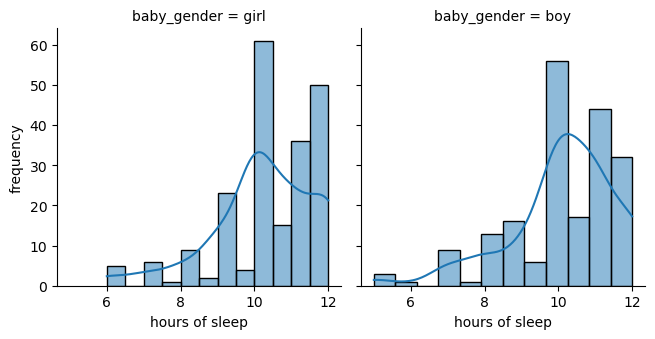

In [16]:
# hours of sleep based of gender
p =sns.FacetGrid(sleep_data, col="baby_gender", height=3.5, aspect=.95)
p.map(sns.histplot, "hours_of_sleep_float", kde=True, bins = 12)
p.set(xlabel='hours of sleep', ylabel='frequency')

In [17]:
p.savefig(config["images"]["hours_by_gender"])

Checking the variable "how falling asleep" and remating it for visulization purposes

In [99]:
sleep_data["how_falling_asleep_bb1"].value_counts()

4    177
1     90
2     74
5     47
3     22
Name: how_falling_asleep_bb1, dtype: int64

In [25]:
def way_fall_asleep(how_falling_asleep_bb1):
    if how_falling_asleep_bb1 == 1:
        return 'while being fed'
    elif how_falling_asleep_bb1 == 2:
        return "while being rocked"
    elif how_falling_asleep_bb1 == 3:
        return "while being held"
    elif how_falling_asleep_bb1 == 4:
        return "alone in the crib"
    else:
        return "in the crib with parental presence"

sleep_data["way_to_fall_asleep"] = sleep_data["how_falling_asleep_bb1"].apply(way_fall_asleep)
sleep_data

,participant_number,type_parents,birth_1mth_m_inclusion,birth_12mth_m_inclusion,age,marital_status,marital_status_edit,education,gestationnal_age,type_pregnancy,...,ibq_r_vsf_28_bb1,ibq_r_vsf_29_bb1,ibq_r_vsf_32_bb1,ibq_r_vsf_33_bb1,night_awakening_number_bb1,how_falling_asleep_bb1,hours_of_sleep_float,baby_months,baby_gender,way_to_fall_asleep
0,1,1,1,1,34,2,2,5,37.0,1,...,4,7,6,5,3,2,10.0,3-6 months,girl,while being rocked
1,2,1,1,1,33,2,2,5,42.0,1,...,2,2,3,4,0,4,11.0,9-12 months,boy,alone in the crib
2,3,1,1,1,37,2,2,5,41.0,1,...,1,4,4,4,1,2,12.0,3-6 months,girl,while being rocked
3,4,1,1,1,31,2,2,5,37.5,1,...,3,4,5,4,2,1,11.0,9-12 months,boy,while being fed
4,5,1,1,1,36,1,1,5,40.0,1,...,4,5,6,6,1,4,10.5,9-12 months,boy,alone in the crib
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,406,1,1,1,31,2,2,3,39.5,1,...,2,4,2,3,1,2,9.0,6-9 months,boy,while being rocked
406,407,1,1,1,26,2,2,2,37.0,1,...,1,1,2,1,0,4,12.0,6-9 months,boy,alone in the crib
407,408,1,1,1,26,2,2,5,39.0,1,...,3,2,3,2,2,5,10.0,3-6 months,girl,in the crib with parental presence
408,409,1,1,1,27,2,2,5,41.2,1,...,1,2,2,1,0,4,11.5,3-6 months,girl,alone in the crib


[Text(0.5, 0, 'frequency'), Text(0, 0.5, 'way to fall asleep')]

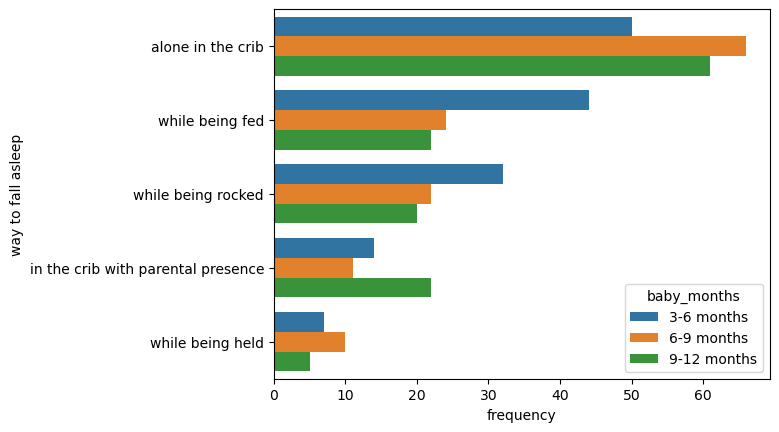

In [26]:
# how the infant is falling asleep
c = sns.countplot(data=sleep_data, y="way_to_fall_asleep", hue="baby_months", hue_order =['3-6 months','6-9 months','9-12 months'],
             order=sleep_data["way_to_fall_asleep"].value_counts().index)
c.set(xlabel='frequency', ylabel='way to fall asleep')

In [30]:
c.figure.savefig(config["images"]["way_to_fall_asleep"])

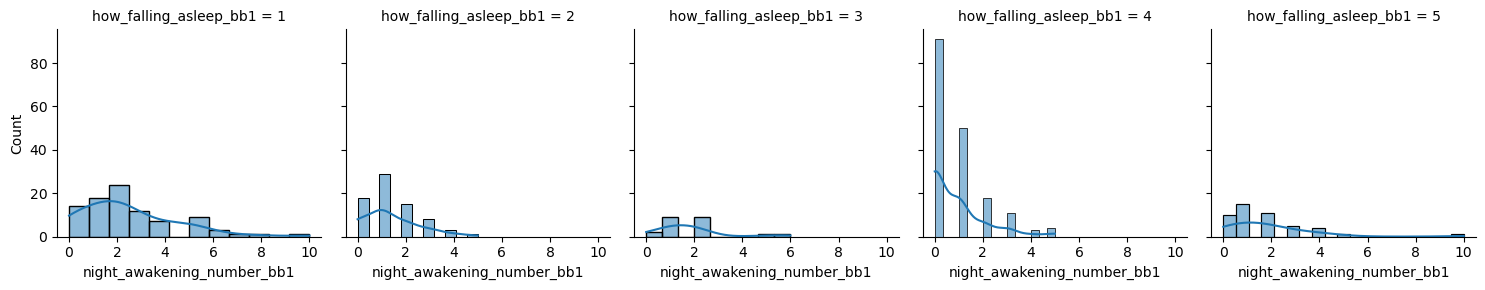

In [19]:
# does the number of awakenigns/nighttime sleep depend on how the infant goes to bed

g =sns.FacetGrid(sleep_data, col="how_falling_asleep_bb1")
g.map(sns.histplot, "night_awakening_number_bb1", kde=True)


Checking the distribution of gestational age, but will not be used in the presentation

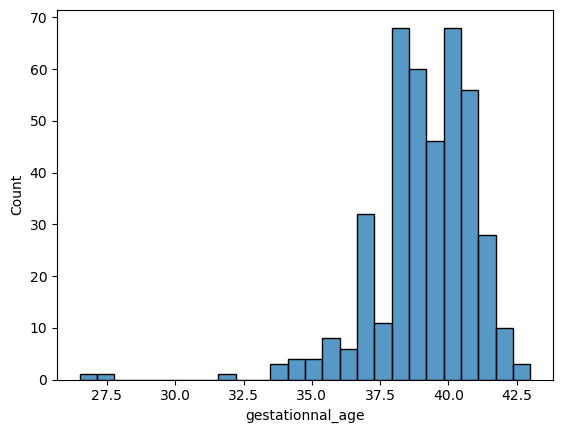

In [20]:
# gestational age
ax = sns.histplot(data=sleep_data, x="gestationnal_age")
#ax = sns.histplot(data=sleep_data, x="hours_of_sleep_float")

In [21]:
# the correlation between gestational age and hours of sleep
corr1 = sleep_data["hours_of_sleep_float"].corr(sleep_data["gestationnal_age"])
print(corr1)

0.05061029632095562


In [22]:
sleep_data.dtypes

participant_number              int64
type_parents                    int64
birth_1mth_m_inclusion          int64
birth_12mth_m_inclusion         int64
age                             int64
marital_status                  int64
marital_status_edit             int64
education                       int64
gestationnal_age              float64
type_pregnancy                  int64
sex_baby1                       int64
child_survey_participation      int64
age_bb                          int64
ibq_r_vsf_3_bb1                 int64
ibq_r_vsf_4_bb1                 int64
ibq_r_vsf_9_bb1                 int64
ibq_r_vsf_10_bb1                int64
ibq_r_vsf_16_bb1                int64
ibq_r_vsf_17_bb1                int64
ibq_r_vsf_28_bb1                int64
ibq_r_vsf_29_bb1                int64
ibq_r_vsf_32_bb1                int64
ibq_r_vsf_33_bb1                int64
night_awakening_number_bb1      int64
how_falling_asleep_bb1          int64
hours_of_sleep_float          float64
baby_months 

Correlation between IBQ survey and sleep patterns

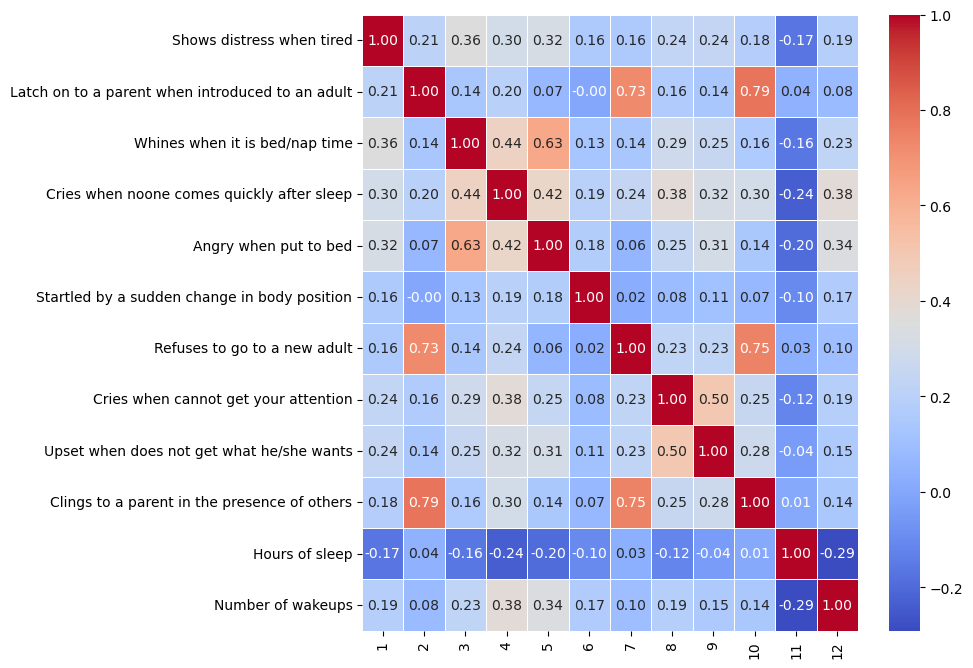

In [23]:
# let´s see if IBQ is correlated with hours of sleep:
ibq_columns = ["ibq_r_vsf_3_bb1", "ibq_r_vsf_4_bb1", "ibq_r_vsf_9_bb1", "ibq_r_vsf_10_bb1", "ibq_r_vsf_16_bb1",
               "ibq_r_vsf_17_bb1", "ibq_r_vsf_28_bb1", "ibq_r_vsf_29_bb1", "ibq_r_vsf_32_bb1", "ibq_r_vsf_33_bb1", "hours_of_sleep_float",
              "night_awakening_number_bb1"]
ax = corr_matrix = sleep_data[ibq_columns].corr()
fig, ax = plt.subplots(figsize=(8, 8))
ax = sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt=".2f",linewidth=.5)
ax.set_xticklabels(["1", "2", 
                    "3", "4",
                    "5","6",
                    "7", "8", 
                    "9", "10",
                    "11", "12"])
ax.set_yticklabels(["Shows distress when tired", "Latch on to a parent when introduced to an adult", 
                    "Whines when it is bed/nap time", "Cries when noone comes quickly after sleep",
                    "Angry when put to bed","Startled by a sudden change in body position",
                    "Refuses to go to a new adult", "Cries when cannot get your attention", 
                    "Upset when does not get what he/she wants", "Clings to a parent in the presence of others",
                    "Hours of sleep", "Number of wakeups"])

#plt.save_fig("../images/correlation_matrix.png")
plt.show()

In [31]:
#ax.set_size_inches(12, 12)
fig.savefig(config["images"]["heatmap"], bbox_inches = "tight")

In [32]:
import scipy.stats as st
from scipy.stats import chi2_contingency

### I would like to check if any of the following variables - way to fall asleep, gender, age group can predict the sleep pattern (hours of sleep and number of night awakenings). I will run a Chi2 test for ech pair of these variables.

### Way to fall asleep - Hours of sleep

In [22]:
#Chi2 test between "how_falling_asleep" and "hours of sleep"
fall_asleep_hours_ct = pd.crosstab(sleep_data["how_falling_asleep_bb1"], sleep_data["hours_of_sleep_float"])
fall_asleep_hours_ct

hours_of_sleep_float,5.00,6.00,7.00,7.50,8.00,8.50,9.00,9.50,10.00,10.50,11.00,11.25,11.50,12.00
how_falling_asleep_bb1,,,,,,,,,,,,,,
1,1,5,5,2,9,1,10,5,22,4,17,0,1,8
2,2,0,3,0,5,0,13,2,26,4,7,0,1,11
3,0,0,0,0,1,0,4,0,10,1,5,0,0,1
4,0,1,5,0,2,1,7,2,42,20,43,1,6,47
5,0,0,2,0,5,0,5,1,17,3,7,0,2,5


In [23]:
print(sleep_data["how_falling_asleep_bb1"].nunique())
print(sleep_data["hours_of_sleep_float"].nunique())
#computing the degrees of freedom:
print("df:",(5-1)*(14-1))

5
14
df: 52


In [24]:
st.chi2.ppf(0.95, df=52)

69.83216033984813

In [27]:
st.chi2_contingency(fall_asleep_hours_ct)

Chi2ContingencyResult(statistic=98.20802110208508, pvalue=0.00011343229399395446, dof=52, expected_freq=array([[ 0.65853659,  1.31707317,  3.29268293,  0.43902439,  4.82926829,
         0.43902439,  8.56097561,  2.19512195, 25.68292683,  7.02439024,
        17.34146341,  0.2195122 ,  2.19512195, 15.80487805],
       [ 0.54146341,  1.08292683,  2.70731707,  0.36097561,  3.97073171,
         0.36097561,  7.03902439,  1.80487805, 21.11707317,  5.77560976,
        14.25853659,  0.1804878 ,  1.80487805, 12.99512195],
       [ 0.16097561,  0.32195122,  0.80487805,  0.10731707,  1.1804878 ,
         0.10731707,  2.09268293,  0.53658537,  6.27804878,  1.71707317,
         4.23902439,  0.05365854,  0.53658537,  3.86341463],
       [ 1.29512195,  2.5902439 ,  6.47560976,  0.86341463,  9.49756098,
         0.86341463, 16.83658537,  4.31707317, 50.5097561 , 13.81463415,
        34.10487805,  0.43170732,  4.31707317, 31.08292683],
       [ 0.34390244,  0.68780488,  1.7195122 ,  0.22926829,  2.52195

In [ ]:
fig, ax = plt.subplots()
x = np.arange(obs.shape[0])
width = 0.35

ax.bar(x - width/2, obs[:,0], width, label='Observed')
ax.bar(x + width/2, expected[:,0], width, label='Expected')
ax.set_xticks(x)
ax.set_xticklabels(['Group 1', 'Group 2'])
ax.set_ylabel('Frequency')
ax.legend()
plt.show()

### Way to fall asleep - Number of night awakenings

In [22]:
#Chi2 test between "how_falling_asleep" and "night awakenings"
fall_asleep_awakenings_ct = pd.crosstab(sleep_data["how_falling_asleep_bb1"], sleep_data["night_awakening_number_bb1"])
fall_asleep_awakenings_ct

night_awakening_number_bb1,0,1,2,3,4,5,6,7,8,10
how_falling_asleep_bb1,,,,,,,,,,
1,14,18,24,12,7,9,3,1,1,1
2,18,29,15,8,3,1,0,0,0,0
3,2,9,9,0,0,1,1,0,0,0
4,91,50,18,11,3,4,0,0,0,0
5,10,15,11,5,4,1,0,0,0,1


In [23]:
print(sleep_data["how_falling_asleep_bb1"].nunique())
print(sleep_data["night_awakening_number_bb1"].nunique())
#computing the degrees of freedom:
print("df:", (5-1)*(10-1))

5
10
df: 36


In [24]:
st.chi2.ppf(0.95, df=36)

50.99846016571065

In [25]:
st.chi2_contingency(fall_asleep_awakenings_ct)

Chi2ContingencyResult(statistic=105.11569073362537, pvalue=1.0927189863854087e-08, dof=36, expected_freq=array([[2.96341463e+01, 2.65609756e+01, 1.69024390e+01, 7.90243902e+00,
        3.73170732e+00, 3.51219512e+00, 8.78048780e-01, 2.19512195e-01,
        2.19512195e-01, 4.39024390e-01],
       [2.43658537e+01, 2.18390244e+01, 1.38975610e+01, 6.49756098e+00,
        3.06829268e+00, 2.88780488e+00, 7.21951220e-01, 1.80487805e-01,
        1.80487805e-01, 3.60975610e-01],
       [7.24390244e+00, 6.49268293e+00, 4.13170732e+00, 1.93170732e+00,
        9.12195122e-01, 8.58536585e-01, 2.14634146e-01, 5.36585366e-02,
        5.36585366e-02, 1.07317073e-01],
       [5.82804878e+01, 5.22365854e+01, 3.32414634e+01, 1.55414634e+01,
        7.33902439e+00, 6.90731707e+00, 1.72682927e+00, 4.31707317e-01,
        4.31707317e-01, 8.63414634e-01],
       [1.54756098e+01, 1.38707317e+01, 8.82682927e+00, 4.12682927e+00,
        1.94878049e+00, 1.83414634e+00, 4.58536585e-01, 1.14634146e-01,
        1.1

#### Chi2 test shows that both "hours of sleep" and "number of night awakenings" can eb used to predict by "way to fall asleep" because our chi2 calculated value is higher than the chi2 critical value.

### Gender - Hours of sleep

In [42]:
#Chi2 test between "gender" and "hours of sleep"
gender_hours_ct = pd.crosstab(sleep_data["sex_baby1"], sleep_data["hours_of_sleep_float"])
gender_hours_ct

hours_of_sleep_float,5.00,6.00,7.00,7.50,8.00,8.50,9.00,9.50,10.00,10.50,11.00,11.25,11.50,12.00
sex_baby1,,,,,,,,,,,,,,
1,0,5,6,1,9,2,23,4,61,15,36,0,7,43
2,3,1,9,1,13,0,16,6,56,17,43,1,3,29


In [43]:
print(sleep_data["sex_baby1"].nunique())
print(sleep_data["hours_of_sleep_float"].nunique())
#computing the degrees of freedom:
print("df:", (2-1)*(14-1))

2
14
df: 13


In [28]:
st.chi2.ppf(0.95, df=13)

22.362032494826934

In [29]:
st.chi2_contingency(gender_hours_ct)

Chi2ContingencyResult(statistic=16.472658138937494, pvalue=0.22454528575233731, dof=13, expected_freq=array([[ 1.55121951,  3.10243902,  7.75609756,  1.03414634, 11.37560976,
         1.03414634, 20.16585366,  5.17073171, 60.49756098, 16.54634146,
        40.84878049,  0.51707317,  5.17073171, 37.22926829],
       [ 1.44878049,  2.89756098,  7.24390244,  0.96585366, 10.62439024,
         0.96585366, 18.83414634,  4.82926829, 56.50243902, 15.45365854,
        38.15121951,  0.48292683,  4.82926829, 34.77073171]]))

### Gender - Number of night awakenings

In [30]:
#Chi2 test between "gender" and "night awakenings"
gender_awakenings_ct = pd.crosstab(sleep_data["sex_baby1"], sleep_data["night_awakening_number_bb1"])
gender_awakenings_ct

night_awakening_number_bb1,0,1,2,3,4,5,6,7,8,10
sex_baby1,,,,,,,,,,
1,74,66,40,12,8,7,4,0,0,1
2,61,55,37,24,9,9,0,1,1,1


In [31]:
print(sleep_data["sex_baby1"].nunique())
print(sleep_data["night_awakening_number_bb1"].nunique())
#computing the degrees of freedom:
print("df:", (2-1)*(10-1))

2
10
df: 9


In [32]:
st.chi2.ppf(0.95, df=9)

16.918977604620448

In [33]:
st.chi2_contingency(gender_awakenings_ct)

Chi2ContingencyResult(statistic=12.213750616652762, pvalue=0.20152557332403845, dof=9, expected_freq=array([[69.80487805, 62.56585366, 39.81463415, 18.61463415,  8.7902439 ,
         8.27317073,  2.06829268,  0.51707317,  0.51707317,  1.03414634],
       [65.19512195, 58.43414634, 37.18536585, 17.38536585,  8.2097561 ,
         7.72682927,  1.93170732,  0.48292683,  0.48292683,  0.96585366]]))

#### Baby gender is independent from the sleep patterns and cannot be used to predict them.

### Baby age - Hours of sleep

In [34]:
#Chi2 test between "baby_age" and "hours of sleep"
age_hours_ct = pd.crosstab(sleep_data["age_bb"], sleep_data["hours_of_sleep_float"])
age_hours_ct

hours_of_sleep_float,5.00,6.00,7.00,7.50,8.00,8.50,9.00,9.50,10.00,10.50,11.00,11.25,11.50,12.00
age_bb,,,,,,,,,,,,,,
1,2,3,8,2,8,0,20,4,49,9,19,0,3,20
2,0,1,3,0,6,1,12,3,43,8,31,1,3,21
3,1,2,4,0,8,1,7,3,25,15,29,0,4,31


In [35]:
print(sleep_data["age_bb"].nunique())
print(sleep_data["hours_of_sleep_float"].nunique())
#computing the degrees of freedom:
print("df:", (3-1)*(14-1))

3
14
df: 26


In [36]:
st.chi2.ppf(0.95, df=26)

38.885138659830055

In [37]:
st.chi2_contingency(age_hours_ct)

Chi2ContingencyResult(statistic=35.64704274077453, pvalue=0.09835378592446901, dof=26, expected_freq=array([[ 1.07560976,  2.15121951,  5.37804878,  0.71707317,  7.88780488,
         0.71707317, 13.98292683,  3.58536585, 41.94878049, 11.47317073,
        28.32439024,  0.35853659,  3.58536585, 25.81463415],
       [ 0.97317073,  1.94634146,  4.86585366,  0.64878049,  7.13658537,
         0.64878049, 12.65121951,  3.24390244, 37.95365854, 10.3804878 ,
        25.62682927,  0.32439024,  3.24390244, 23.35609756],
       [ 0.95121951,  1.90243902,  4.75609756,  0.63414634,  6.97560976,
         0.63414634, 12.36585366,  3.17073171, 37.09756098, 10.14634146,
        25.04878049,  0.31707317,  3.17073171, 22.82926829]]))

### Baby age - Number of night awakenings

In [38]:
#Chi2 test between "baby_age" and "night awakenings"
age_awakenings_ct = pd.crosstab(sleep_data["age_bb"], sleep_data["night_awakening_number_bb1"])
age_awakenings_ct

night_awakening_number_bb1,0,1,2,3,4,5,6,7,8,10
age_bb,,,,,,,,,,
1,48,37,33,14,5,7,2,1,0,0
2,39,52,23,10,6,2,1,0,0,0
3,48,32,21,12,6,7,1,0,1,2


In [39]:
print(sleep_data["age_bb"].nunique())
print(sleep_data["night_awakening_number_bb1"].nunique())
#computing the degrees of freedom:
print("df:", (3-1)*(10-1))

3
10
df: 18


In [40]:
st.chi2.ppf(0.95, df=18)

28.869299430392623

In [41]:
st.chi2_contingency(age_awakenings_ct)

Chi2ContingencyResult(statistic=21.22415517401911, pvalue=0.2682553736127601, dof=18, expected_freq=array([[48.40243902, 43.38292683, 27.60731707, 12.90731707,  6.09512195,
         5.73658537,  1.43414634,  0.35853659,  0.35853659,  0.71707317],
       [43.79268293, 39.25121951, 24.97804878, 11.67804878,  5.51463415,
         5.1902439 ,  1.29756098,  0.32439024,  0.32439024,  0.64878049],
       [42.80487805, 38.36585366, 24.41463415, 11.41463415,  5.3902439 ,
         5.07317073,  1.26829268,  0.31707317,  0.31707317,  0.63414634]]))

#### Baby age is independent from sleep pattents and cannot be used to predict them

In [ ]:
# let´s see if IBQ is correlated with hours of sleep:
chi2_cols = ["age_bb", "sex_baby1", "hours_of_sleep_float",
              "night_awakening_number_bb1", "how_falling_asleep_bb1"]
corr_matrix1 = sleep_data[chi2_cols].corr()
sns.heatmap(corr_matrix1, cmap="coolwarm", annot=True, fmt=".2f")
#plt.save_fig("../images/correlation_matrix.png")
plt.show()

In [ ]:
try:
    